## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 383us/step - loss: 1.9499 - acc: 0.2985 - val_loss: 1.7605 - val_acc: 0.3660
Epoch 2/100
50000/50000 [==============================] - 11s 216us/step - loss: 1.7108 - acc: 0.3855 - val_loss: 1.6505 - val_acc: 0.4136
Epoch 3/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.6202 - acc: 0.4228 - val_loss: 1.6359 - val_acc: 0.4136
Epoch 4/100
50000/50000 [==============================] - 5s 100us/step - loss: 1.5542 - acc: 0.4458 - val_loss: 1.5861 - val_acc: 0.4423
Epoch 5/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.5097 - acc: 0.4636 - val_loss: 1.5248 - val_acc: 0.4585
Epoch 6/100
50000/50000 [==============================] - 5s 100us/step - loss: 1.4683 - acc: 0.4741 - val_loss: 1.4709 - val_acc: 0.4768
Epoch 7/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.4381 - acc: 0.4891 - val_loss: 1

50000/50000 [==============================] - 5s 93us/step - loss: 0.5378 - acc: 0.8085 - val_loss: 2.0378 - val_acc: 0.5148
Epoch 60/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.5308 - acc: 0.8109 - val_loss: 2.0728 - val_acc: 0.5102
Epoch 61/100
50000/50000 [==============================] - 5s 94us/step - loss: 0.5307 - acc: 0.8087 - val_loss: 2.0776 - val_acc: 0.5111
Epoch 62/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.5126 - acc: 0.8176 - val_loss: 2.1029 - val_acc: 0.5098
Epoch 63/100
50000/50000 [==============================] - 5s 94us/step - loss: 0.4900 - acc: 0.8244 - val_loss: 2.1676 - val_acc: 0.4928
Epoch 64/100
50000/50000 [==============================] - 5s 94us/step - loss: 0.4978 - acc: 0.8198 - val_loss: 2.1951 - val_acc: 0.5053
Epoch 65/100
50000/50000 [==============================] - 5s 94us/step - loss: 0.4937 - acc: 0.8214 - val_loss: 2.1595 - val_acc: 0.5138
Epoch 66/100
50000/50000 [==============

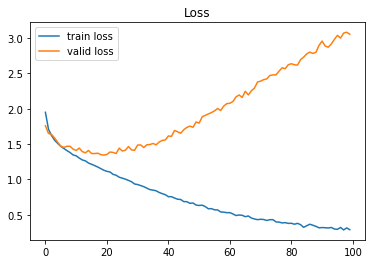

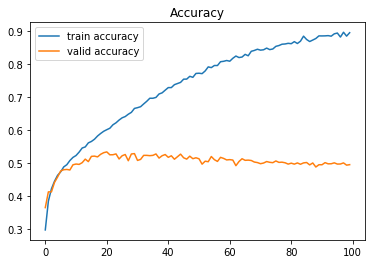

In [7]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [8]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [9]:
"""
Compile 模型
"""
import copy

model_500 = copy.deepcopy(model)
model_sgd = copy.deepcopy(model)

optimizer = keras.optimizers.Adam(lr=0.001)
model_500.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


model_sgd.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=keras.optimizers.SGD())

C:\Users\tony8\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [11]:
"""
設定要訓練的 Epoch 數
"""
model_500.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

model_sgd.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.7224 - acc: 0.7418 - val_loss: 1.6905 - val_acc: 0.5239
Epoch 2/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.6945 - acc: 0.7528 - val_loss: 1.7165 - val_acc: 0.5180
Epoch 3/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.6838 - acc: 0.7546 - val_loss: 1.7183 - val_acc: 0.5165
Epoch 4/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.6755 - acc: 0.7582 - val_loss: 1.7614 - val_acc: 0.5166
Epoch 5/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.6643 - acc: 0.7623 - val_loss: 1.7543 - val_acc: 0.5170
Epoch 6/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.6474 - acc: 0.7683 - val_loss: 1.7829 - val_acc: 0.5144
Epoch 7/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.6368 - acc: 0.7724 - val_loss: 1.8432 - 

50000/50000 [==============================] - 7s 146us/step - loss: 0.2722 - acc: 0.9020 - val_loss: 3.1351 - val_acc: 0.5011
Epoch 60/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.2495 - acc: 0.9102 - val_loss: 3.1638 - val_acc: 0.5029
Epoch 61/500
50000/50000 [==============================] - 7s 150us/step - loss: 0.2716 - acc: 0.9025 - val_loss: 3.2540 - val_acc: 0.5013
Epoch 62/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.2788 - acc: 0.8992 - val_loss: 3.2332 - val_acc: 0.4913
Epoch 63/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.2839 - acc: 0.8968 - val_loss: 3.1764 - val_acc: 0.4933
Epoch 64/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.2496 - acc: 0.9105 - val_loss: 3.2401 - val_acc: 0.4994
Epoch 65/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.2589 - acc: 0.9069 - val_loss: 3.2832 - val_acc: 0.4910
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 146us/step - loss: 0.1402 - acc: 0.9505 - val_loss: 4.0841 - val_acc: 0.4921
Epoch 118/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.1910 - acc: 0.9318 - val_loss: 4.0491 - val_acc: 0.4836
Epoch 119/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.1806 - acc: 0.9367 - val_loss: 4.0811 - val_acc: 0.4987
Epoch 120/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.1436 - acc: 0.9483 - val_loss: 4.0642 - val_acc: 0.4859
Epoch 121/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.1736 - acc: 0.9400 - val_loss: 4.1643 - val_acc: 0.4873
Epoch 122/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.2008 - acc: 0.9295 - val_loss: 4.0931 - val_acc: 0.4893
Epoch 123/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.1856 - acc: 0.9350 - val_loss: 4.0405 - val_acc: 0.4889
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 147us/step - loss: 0.1098 - acc: 0.9606 - val_loss: 4.6113 - val_acc: 0.4903
Epoch 176/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1589 - acc: 0.9454 - val_loss: 4.6280 - val_acc: 0.4962
Epoch 177/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.2088 - acc: 0.9302 - val_loss: 4.5786 - val_acc: 0.4848
Epoch 178/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1534 - acc: 0.9470 - val_loss: 4.5463 - val_acc: 0.4891
Epoch 179/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1052 - acc: 0.9622 - val_loss: 4.5438 - val_acc: 0.4905
Epoch 180/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0744 - acc: 0.9740 - val_loss: 4.5786 - val_acc: 0.4935
Epoch 181/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1011 - acc: 0.9653 - val_loss: 4.6331 - val_acc: 0.4791
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 148us/step - loss: 0.1495 - acc: 0.9507 - val_loss: 4.7881 - val_acc: 0.4912
Epoch 234/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1259 - acc: 0.9573 - val_loss: 4.9055 - val_acc: 0.4945
Epoch 235/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1114 - acc: 0.9623 - val_loss: 4.8670 - val_acc: 0.4906
Epoch 236/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0735 - acc: 0.9741 - val_loss: 4.7993 - val_acc: 0.4920
Epoch 237/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1331 - acc: 0.9555 - val_loss: 4.8871 - val_acc: 0.4871
Epoch 238/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1062 - acc: 0.9628 - val_loss: 4.8832 - val_acc: 0.4907
Epoch 239/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0764 - acc: 0.9733 - val_loss: 4.8506 - val_acc: 0.4954
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 7s 148us/step - loss: 0.1440 - acc: 0.9529 - val_loss: 4.9336 - val_acc: 0.4902
Epoch 292/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0602 - acc: 0.9793 - val_loss: 5.0114 - val_acc: 0.4920
Epoch 293/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0570 - acc: 0.9802 - val_loss: 4.9762 - val_acc: 0.4957
Epoch 294/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0348 - acc: 0.9878 - val_loss: 5.0528 - val_acc: 0.4890
Epoch 295/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0860 - acc: 0.9721 - val_loss: 5.1089 - val_acc: 0.4872
Epoch 296/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.2488 - acc: 0.9274 - val_loss: 4.9898 - val_acc: 0.4908
Epoch 297/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1666 - acc: 0.9491 - val_loss: 5.0301 - val_acc: 0.4831
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 7s 147us/step - loss: 0.0430 - acc: 0.9863 - val_loss: 5.0672 - val_acc: 0.4943
Epoch 350/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0350 - acc: 0.9883 - val_loss: 5.0377 - val_acc: 0.4910
Epoch 351/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0357 - acc: 0.9878 - val_loss: 5.1248 - val_acc: 0.4867
Epoch 352/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1084 - acc: 0.9643 - val_loss: 5.1512 - val_acc: 0.4907
Epoch 353/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1374 - acc: 0.9566 - val_loss: 5.0830 - val_acc: 0.4878
Epoch 354/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1224 - acc: 0.9600 - val_loss: 5.0456 - val_acc: 0.4891
Epoch 355/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1039 - acc: 0.9655 - val_loss: 5.0667 - val_acc: 0.4918
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 7s 147us/step - loss: 0.0372 - acc: 0.9880 - val_loss: 5.2732 - val_acc: 0.4927
Epoch 408/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0742 - acc: 0.9748 - val_loss: 5.2730 - val_acc: 0.4879
Epoch 409/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1185 - acc: 0.9624 - val_loss: 5.2572 - val_acc: 0.4860
Epoch 410/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1131 - acc: 0.9639 - val_loss: 5.3040 - val_acc: 0.4882
Epoch 411/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0658 - acc: 0.9792 - val_loss: 5.2568 - val_acc: 0.4907
Epoch 412/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0564 - acc: 0.9807 - val_loss: 5.2542 - val_acc: 0.4952
Epoch 413/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0728 - acc: 0.9769 - val_loss: 5.3984 - val_acc: 0.4919
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 8s 155us/step - loss: 0.0997 - acc: 0.9693 - val_loss: 5.4523 - val_acc: 0.4868
Epoch 466/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.1304 - acc: 0.9603 - val_loss: 5.4739 - val_acc: 0.4874
Epoch 467/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0647 - acc: 0.9799 - val_loss: 5.4491 - val_acc: 0.4888
Epoch 468/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0603 - acc: 0.9802 - val_loss: 5.4375 - val_acc: 0.4917
Epoch 469/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0357 - acc: 0.9886 - val_loss: 5.5289 - val_acc: 0.4888
Epoch 470/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0746 - acc: 0.9760 - val_loss: 5.6063 - val_acc: 0.4801
Epoch 471/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1305 - acc: 0.9614 - val_loss: 5.4237 - val_acc: 0.4916
Epoch 472/500
50000/50000 [=====

50000/50000 [==============================] - 3s 57us/step - loss: 1.4347 - acc: 0.4967 - val_loss: 1.4955 - val_acc: 0.4652
Epoch 24/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4216 - acc: 0.4999 - val_loss: 1.5200 - val_acc: 0.4552
Epoch 25/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4164 - acc: 0.5027 - val_loss: 1.5521 - val_acc: 0.4440
Epoch 26/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4052 - acc: 0.5087 - val_loss: 1.4906 - val_acc: 0.4717
Epoch 27/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.3969 - acc: 0.5082 - val_loss: 1.4827 - val_acc: 0.4787
Epoch 28/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.3851 - acc: 0.5152 - val_loss: 1.5417 - val_acc: 0.4551
Epoch 29/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3754 - acc: 0.5175 - val_loss: 1.4829 - val_acc: 0.4694
Epoch 30/500
50000/50000 [==============

50000/50000 [==============================] - 3s 57us/step - loss: 1.0405 - acc: 0.6384 - val_loss: 1.4093 - val_acc: 0.5112
Epoch 83/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0406 - acc: 0.6385 - val_loss: 1.3919 - val_acc: 0.5170
Epoch 84/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0370 - acc: 0.6406 - val_loss: 1.3849 - val_acc: 0.5116
Epoch 85/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0261 - acc: 0.6434 - val_loss: 1.3607 - val_acc: 0.5255
Epoch 86/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0163 - acc: 0.6471 - val_loss: 1.3672 - val_acc: 0.5288
Epoch 87/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.0135 - acc: 0.6481 - val_loss: 1.4784 - val_acc: 0.4980
Epoch 88/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.9987 - acc: 0.6545 - val_loss: 1.4995 - val_acc: 0.4790
Epoch 89/500
50000/50000 [==============

Epoch 141/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.7431 - acc: 0.7447 - val_loss: 1.6046 - val_acc: 0.4834
Epoch 142/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.7315 - acc: 0.7496 - val_loss: 1.7232 - val_acc: 0.4680
Epoch 143/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.7409 - acc: 0.7440 - val_loss: 1.5164 - val_acc: 0.5099
Epoch 144/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.7221 - acc: 0.7490 - val_loss: 1.6930 - val_acc: 0.4817
Epoch 145/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.7256 - acc: 0.7525 - val_loss: 1.4844 - val_acc: 0.5295
Epoch 146/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.7112 - acc: 0.7552 - val_loss: 1.4888 - val_acc: 0.5207
Epoch 147/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.7152 - acc: 0.7544 - val_loss: 1.4283 - val_acc: 0.5345
Epoch 148/500
50000/

50000/50000 [==============================] - 3s 59us/step - loss: 0.4582 - acc: 0.8471 - val_loss: 1.8165 - val_acc: 0.5015
Epoch 200/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.4654 - acc: 0.8468 - val_loss: 1.7905 - val_acc: 0.5184
Epoch 201/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.4906 - acc: 0.8385 - val_loss: 1.8071 - val_acc: 0.5289
Epoch 202/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.4572 - acc: 0.8488 - val_loss: 1.8054 - val_acc: 0.5238
Epoch 203/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.4608 - acc: 0.8479 - val_loss: 1.7585 - val_acc: 0.5290
Epoch 204/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.4367 - acc: 0.8559 - val_loss: 1.6696 - val_acc: 0.5389
Epoch 205/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.4358 - acc: 0.8572 - val_loss: 2.1863 - val_acc: 0.4751
Epoch 206/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 0.3157 - acc: 0.9069 - val_loss: 1.9827 - val_acc: 0.5240
Epoch 258/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2317 - acc: 0.9285 - val_loss: 1.9510 - val_acc: 0.5433
Epoch 259/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2641 - acc: 0.9265 - val_loss: 2.2774 - val_acc: 0.5105
Epoch 260/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.2260 - acc: 0.9367 - val_loss: 2.7093 - val_acc: 0.4621
Epoch 261/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2312 - acc: 0.9341 - val_loss: 2.5419 - val_acc: 0.4754
Epoch 262/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.2189 - acc: 0.9379 - val_loss: 2.2369 - val_acc: 0.5205
Epoch 263/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.1996 - acc: 0.9446 - val_loss: 2.1278 - val_acc: 0.5340
Epoch 264/500
50000/50000 [=======

50000/50000 [==============================] - 3s 58us/step - loss: 0.2439 - acc: 0.9417 - val_loss: 2.1949 - val_acc: 0.4985
Epoch 316/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2086 - acc: 0.9506 - val_loss: 2.2910 - val_acc: 0.5250
Epoch 317/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0851 - acc: 0.9835 - val_loss: 2.3306 - val_acc: 0.5414
Epoch 318/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0704 - acc: 0.9879 - val_loss: 2.3870 - val_acc: 0.5410
Epoch 319/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.1555 - acc: 0.9642 - val_loss: 2.3925 - val_acc: 0.5347
Epoch 320/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0651 - acc: 0.9899 - val_loss: 2.3347 - val_acc: 0.5478
Epoch 321/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0607 - acc: 0.9904 - val_loss: 2.3843 - val_acc: 0.5354
Epoch 322/500
50000/50000 [=======

50000/50000 [==============================] - 3s 58us/step - loss: 0.0310 - acc: 0.9976 - val_loss: 2.6285 - val_acc: 0.5386
Epoch 374/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0304 - acc: 0.9975 - val_loss: 2.5995 - val_acc: 0.5385
Epoch 375/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0291 - acc: 0.9980 - val_loss: 2.6277 - val_acc: 0.5376
Epoch 376/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0287 - acc: 0.9979 - val_loss: 2.6228 - val_acc: 0.5407
Epoch 377/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0279 - acc: 0.9981 - val_loss: 2.6191 - val_acc: 0.5407
Epoch 378/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0271 - acc: 0.9982 - val_loss: 2.6309 - val_acc: 0.5408
Epoch 379/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0266 - acc: 0.9981 - val_loss: 2.6936 - val_acc: 0.5272
Epoch 380/500
50000/50000 [=======

50000/50000 [==============================] - 3s 61us/step - loss: 0.0134 - acc: 0.9996 - val_loss: 2.8156 - val_acc: 0.5409
Epoch 432/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0131 - acc: 0.9995 - val_loss: 2.8327 - val_acc: 0.5449
Epoch 433/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0135 - acc: 0.9994 - val_loss: 2.8278 - val_acc: 0.5405
Epoch 434/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0127 - acc: 0.9996 - val_loss: 2.8314 - val_acc: 0.5418
Epoch 435/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0125 - acc: 0.9997 - val_loss: 2.8554 - val_acc: 0.5379
Epoch 436/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0124 - acc: 0.9997 - val_loss: 2.8399 - val_acc: 0.5429
Epoch 437/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0122 - acc: 0.9997 - val_loss: 2.8627 - val_acc: 0.5405
Epoch 438/500
50000/50000 [=======

50000/50000 [==============================] - 3s 60us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.0325 - val_acc: 0.5416
Epoch 490/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0069 - acc: 0.9999 - val_loss: 3.1936 - val_acc: 0.5220
Epoch 491/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.3475 - acc: 0.7383 - val_loss: 2.5357 - val_acc: 0.5078
Epoch 492/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.4109 - acc: 0.8835 - val_loss: 2.8318 - val_acc: 0.5311
Epoch 493/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.2874 - acc: 0.9249 - val_loss: 2.7767 - val_acc: 0.5419
Epoch 494/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0206 - acc: 0.9990 - val_loss: 2.8059 - val_acc: 0.5450
Epoch 495/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0160 - acc: 0.9995 - val_loss: 2.8495 - val_acc: 0.5450
Epoch 496/500
50000/50000 [=======

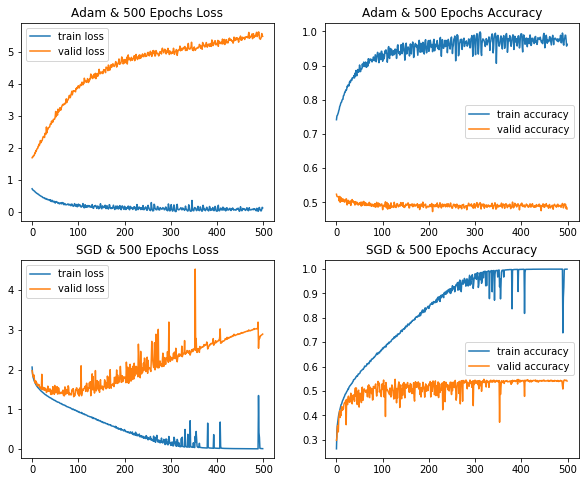

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# 以視覺畫方式檢視訓練過程

train_loss_500 = model_500.history.history["loss"]
valid_loss_500 = model_500.history.history["val_loss"]

train_acc_500 = model_500.history.history["acc"]
valid_acc_500 = model_500.history.history["val_acc"]

train_loss_sgd = model_sgd.history.history["loss"]
valid_loss_sgd = model_sgd.history.history["val_loss"]

train_acc_sgd = model_sgd.history.history["acc"]
valid_acc_sgd = model_sgd.history.history["val_acc"]

plt.subplot(2,2,1)
plt.plot(range(len(train_loss_500)), train_loss_500, label="train loss")
plt.plot(range(len(valid_loss_500)), valid_loss_500, label="valid loss")
plt.legend()
plt.title("Adam & 500 Epochs Loss")

plt.subplot(2,2,2)
plt.plot(range(len(train_acc_500)), train_acc_500, label="train accuracy")
plt.plot(range(len(valid_acc_500)), valid_acc_500, label="valid accuracy")
plt.legend()
plt.title("Adam & 500 Epochs Accuracy")

plt.subplot(2,2,3)
plt.plot(range(len(train_loss_sgd)), train_loss_sgd, label="train loss")
plt.plot(range(len(valid_loss_sgd)), valid_loss_sgd, label="valid loss")
plt.legend()
plt.title("SGD & 500 Epochs Loss")

plt.subplot(2,2,4)
plt.plot(range(len(train_acc_sgd)), train_acc_sgd, label="train accuracy")
plt.plot(range(len(valid_acc_sgd)), valid_acc_sgd, label="valid accuracy")
plt.legend()
plt.title("SGD & 500 Epochs Accuracy")

plt.show()